A1

Converged in 130 epochs.


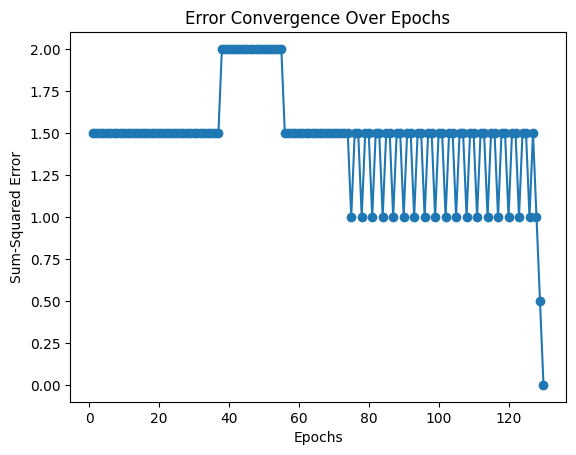

Final weights: [-0.1   0.1   0.05]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights
W = np.array([10, 0.2, -0.75])

# Input data for AND gate
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Desired output for AND gate
y = np.array([0, 0, 0, 1])

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Error threshold for convergence
convergence_error = 0.002

# Function to calculate step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(X, y, W, alpha, max_epochs, convergence_error):
    error_values = []

    for epoch in range(max_epochs):
        error_sum = 0

        for i in range(len(X)):
            # Calculate the predicted output
            prediction = step_activation(np.dot(X[i], W))

            # Calculate the error
            error = y[i] - prediction

            # Update weights
            W = W + alpha * error * X[i]

            # Accumulate the squared error for this sample
            error_sum += error ** 2

        # Calculate the sum-squared error for all samples in this epoch
        total_error = 0.5 * error_sum

        # Append error to the list for plotting
        error_values.append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged in {epoch + 1} epochs.")
            break

    return W, error_values

# Train the perceptron
final_weights, errors = train_perceptron(X, y, W, alpha, max_epochs, convergence_error)

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs')
plt.show()

# Display the final weights
print("Final weights:", final_weights)


A2

In [11]:
import numpy as np

# Define the step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Define the sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Define the ReLU activation function
def relu_activation(x):
    return np.maximum(0, x)

# Initialize the weights and bias
w0 = 10
w1 = -0.1
w2 = -0.25
weights = np.array([w1, w2])
bias = w0

# Define the learning rate
learning_rate = 0.05

# Define the input and output for the AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
correct_outputs = np.array([0, 0, 0, 1])

# List of activation functions
activation_functions = [step_activation, sigmoid_activation, relu_activation]

for activation_func in activation_functions:
    print(f"Training with {activation_func.__name__} activation function:")
    weights = np.array([w1, w2])  # Reset weights
    bias = w0  # Reset bias
    epoch = 0

    while True:
        error_sum = 0
        for i in range(len(inputs)):
            # Forward pass
            input_layer = inputs[i]
            weighted_sum = np.dot(input_layer, weights) + bias
            activated_output = activation_func(weighted_sum)

            # Calculate the error
            error = correct_outputs[i] - activated_output
            error_sum += error**2

            # Update weights and bias if there is an error
            if error != 0:
                weights += learning_rate * error * input_layer
                bias += learning_rate * error

        # Calculate the sum-squared error
        sum_squared_error = error_sum / len(inputs)

        # Print the sum-squared error every epoch
        print(f"Epoch {epoch}: Sum-squared error: {sum_squared_error}")

        # Check for convergence
        if sum_squared_error <= 0.002:
            break

        epoch += 1
        if epoch >= 1000:  # Stop if 1000 epochs are reached without convergence
            print("Convergence not reached within 1000 epochs.")
            break

    # Display the final weights and bias
    print("Final weights:", weights)
    print("Final bias:", bias)

    # Test the perceptron with the inputs
    print("Testing the trained perceptron:")
    for i in range(len(inputs)):
        weighted_sum = np.dot(inputs[i], weights) + bias
        activated_output = activation_func(weighted_sum)
        print(f"Input: {inputs[i]} - Output: {activated_output}")
    print()

Training with step_activation activation function:
Epoch 0: Sum-squared error: 0.75
Epoch 1: Sum-squared error: 0.75
Epoch 2: Sum-squared error: 0.75
Epoch 3: Sum-squared error: 0.75
Epoch 4: Sum-squared error: 0.75
Epoch 5: Sum-squared error: 0.75
Epoch 6: Sum-squared error: 0.75
Epoch 7: Sum-squared error: 0.75
Epoch 8: Sum-squared error: 0.75
Epoch 9: Sum-squared error: 0.75
Epoch 10: Sum-squared error: 0.75
Epoch 11: Sum-squared error: 0.75
Epoch 12: Sum-squared error: 0.75
Epoch 13: Sum-squared error: 0.75
Epoch 14: Sum-squared error: 0.75
Epoch 15: Sum-squared error: 0.75
Epoch 16: Sum-squared error: 0.75
Epoch 17: Sum-squared error: 0.75
Epoch 18: Sum-squared error: 0.75
Epoch 19: Sum-squared error: 0.75
Epoch 20: Sum-squared error: 0.75
Epoch 21: Sum-squared error: 0.75
Epoch 22: Sum-squared error: 0.75
Epoch 23: Sum-squared error: 0.75
Epoch 24: Sum-squared error: 0.75
Epoch 25: Sum-squared error: 0.75
Epoch 26: Sum-squared error: 0.75
Epoch 27: Sum-squared error: 0.75
Epoch 2

A3

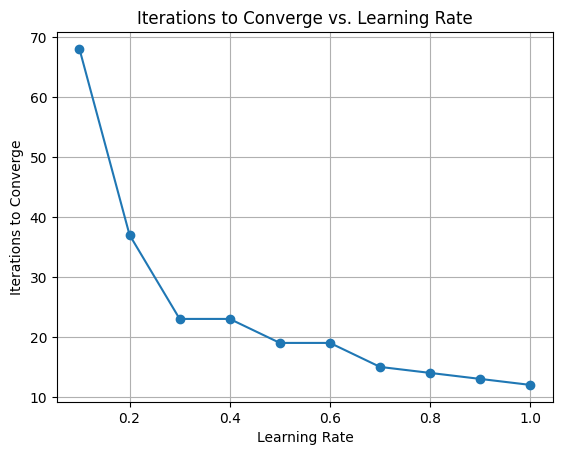

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights
W = np.array([10, 0.2, -0.75])

# Input data for AND gate
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Desired output for AND gate
y = np.array([0, 0, 0, 1])

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Maximum number of epochs
max_epochs = 1000

# Error threshold for convergence
convergence_error = 0.002

# Function to calculate step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(X, y, W, alpha, max_epochs, convergence_error):
    iterations_to_converge = []

    for alpha in learning_rates:
        # Copy initial weights for each learning rate
        W_copy = np.copy(W)

        for epoch in range(max_epochs):
            error_sum = 0

            for i in range(len(X)):
                # Calculate the predicted output
                prediction = step_activation(np.dot(X[i], W_copy))

                # Calculate the error
                error = y[i] - prediction

                # Update weights
                W_copy = W_copy + alpha * error * X[i]

                # Accumulate the squared error for this sample
                error_sum += error ** 2

            # Calculate the sum-squared error for all samples in this epoch
            total_error = 0.5 * error_sum

            # Check for convergence
            if total_error <= convergence_error:
                iterations_to_converge.append(epoch + 1)
                break

    return iterations_to_converge

# Train the perceptron and record iterations for each learning rate
iterations_to_converge = train_perceptron(X, y, W, learning_rates, max_epochs, convergence_error)

# Plotting learning rates against iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs. Learning Rate')
plt.grid(True)
plt.show()


A4

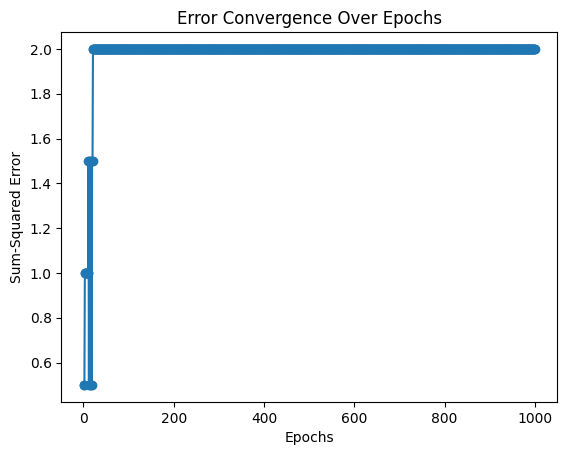

Final weights: [ 0.   -0.05 -0.05]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights
W = np.array([-0.1, 0.2, -0.75])

# Input data for XOR gate
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Desired output for XOR gate
y = np.array([0, 1, 1, 0])

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Error threshold for convergence
convergence_error = 0.002

# Function to calculate step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(X, y, W, alpha, max_epochs, convergence_error):
    error_values = []

    for epoch in range(max_epochs):
        error_sum = 0

        for i in range(len(X)):
            # Calculate the predicted output
            prediction = step_activation(np.dot(X[i], W))

            # Calculate the error
            error = y[i] - prediction

            # Update weights
            W = W + alpha * error * X[i]

            # Accumulate the squared error for this sample
            error_sum += error ** 2

        # Calculate the sum-squared error for all samples in this epoch
        total_error = 0.5 * error_sum

        # Append error to the list for plotting
        error_values.append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            print(f"Converged in {epoch + 1} epochs.")
            break

    return W, error_values

# Train the perceptron
final_weights, errors = train_perceptron(X, y, W, alpha, max_epochs, convergence_error)

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs')
plt.show()

# Display the final weights
print("Final weights:", final_weights)


In [12]:
import numpy as np

# Step 1: Data Preparation
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])

# Separate features and target
X = data[:, :-1]
y = data[:, -1]

# Step 2: Initialize Weights and Learning Rate
weights = np.random.rand(X.shape[1])
learning_rate = 0.01

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Step 3: Training the Perceptron
for epoch in range(1000):
    for i in range(X.shape[0]):
        # Forward pass
        z = np.dot(X[i], weights)
        prediction = sigmoid(z)
        
        # Calculate the error
        error = y[i] - prediction
        
        # Backpropagation
        weights += learning_rate * error * sigmoid_derivative(prediction) * X[i]

# Step 4: Evaluation
for i in range(X.shape[0]):
    z = np.dot(X[i], weights)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")


Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = True
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = True
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = True
Transaction 10: Predicted High Value = True


A6

In [1]:
import numpy as np
import pandas as pd
file_path = r"C:\Users\THANUJ RAJA\OneDrive\Desktop\Transactions.xlsx"
try:
    df = pd.read_excel(file_path)
except Exception as e:
    print("Error reading Excel file:", e)
    raise SystemExit

print("Column Names:", df.columns)

df['High Value Tx?'] = df['High Value Tx?'].apply(lambda x: 1 if x == 'Yes' else -1)

X = df[['Candies (#)', 'Manogoes(Kg)', 'Milk Packets (#)', 'Payment(Rs)']].values
y = df['High Value Tx?'].values

X_bias = np.c_[np.ones(X.shape[0]), X]

def perceptron_learning(X, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) > 0:
                y_pred = 1
            else:
                y_pred = -1
            weights += learning_rate * (y[i] - y_pred) * X[i]
    return weights

perceptron_weights = perceptron_learning(X_bias, y)

pseudo_inverse_weights = np.linalg.pinv(X_bias) @ y

print("Weights from Perceptron Learning:", perceptron_weights)
print("Weights from Matrix Pseudo-Inverse:", pseudo_inverse_weights)

Column Names: Index(['Customer', 'Candies (#)', 'Manogoes(Kg)', 'Milk Packets (#)',
       'Payment(Rs)', 'High Value Tx?'],
      dtype='object')
Weights from Perceptron Learning: [  -8.84 -114.84   18.4   -49.28   10.12]
Weights from Matrix Pseudo-Inverse: [-0.7720194  -0.05579846  0.02947478 -0.08646498  0.00894496]


A7

In [13]:
import numpy as np

def sigmoid(x):
 """
 Sigmoid activation function
 """
 return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
 """
 Derivative of the sigmoid activation function
 """
 return sigmoid(x) * (1 - sigmoid(x))

def AND_gate(x1, x2, target):
    """
    AND gate logic using a neural network
    """
    weights = np.array([0.5, 0.5]) # Initialize weights
    bias = -1.5 # Initialize bias
    
    # Forward propagation
    z = np.dot(weights, [x1, x2]) + bias
    h = sigmoid(z)
    
    # Calculate the error
    error = h - target
    
    # Backward propagation
    delta = error * derivative_sigmoid(z) # Corrected calculation of delta
    weight_delta = delta * np.array([x1, x2]) # Corrected calculation of weight_delta
    
    # Update weights and bias based on learning rate
    weights -= learning_rate * weight_delta
    bias -= learning_rate * delta
    
    return h

learning_rate = 0.05
epochs = 1000

# Training data
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
targets = np.array([0, 0, 0, 1])

for epoch in range(epochs):
 # Forward propagation
 outputs = np.array([AND_gate(x1, x2, target) for x1, x2, target in zip(inputs[:, 0], inputs[:, 1], targets)])
  
 # Error calculation (mean squared error)
 error = np.mean(np.square(targets - outputs))
  
 # Print error for each epoch (optional)
 print(f'Epoch: {epoch+1}, Error: {error}')
  
 # Break loop if error is below convergence threshold
 if error <= 0.002:
    break

print('Training complete!')


Epoch: 1, Error: 0.14134841674832752
Epoch: 2, Error: 0.14134841674832752
Epoch: 3, Error: 0.14134841674832752
Epoch: 4, Error: 0.14134841674832752
Epoch: 5, Error: 0.14134841674832752
Epoch: 6, Error: 0.14134841674832752
Epoch: 7, Error: 0.14134841674832752
Epoch: 8, Error: 0.14134841674832752
Epoch: 9, Error: 0.14134841674832752
Epoch: 10, Error: 0.14134841674832752
Epoch: 11, Error: 0.14134841674832752
Epoch: 12, Error: 0.14134841674832752
Epoch: 13, Error: 0.14134841674832752
Epoch: 14, Error: 0.14134841674832752
Epoch: 15, Error: 0.14134841674832752
Epoch: 16, Error: 0.14134841674832752
Epoch: 17, Error: 0.14134841674832752
Epoch: 18, Error: 0.14134841674832752
Epoch: 19, Error: 0.14134841674832752
Epoch: 20, Error: 0.14134841674832752
Epoch: 21, Error: 0.14134841674832752
Epoch: 22, Error: 0.14134841674832752
Epoch: 23, Error: 0.14134841674832752
Epoch: 24, Error: 0.14134841674832752
Epoch: 25, Error: 0.14134841674832752
Epoch: 26, Error: 0.14134841674832752
Epoch: 27, Error: 0.1

A8

In [12]:
import numpy as np

def sigmoid(x):
    """
    Sigmoid activation function
    """
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    """
    Derivative of the sigmoid activation function
    """
    return sigmoid(x) * (1 - sigmoid(x))

def XOR_gate(x1, x2, target, weights_hidden, weights_output, bias_hidden, bias_output):
    """
    XOR gate logic using a neural network
    """
    # Forward propagation
    # Hidden layer
    z_hidden = np.dot(weights_hidden, np.array([x1, x2])) + bias_hidden
    h_hidden = sigmoid(z_hidden)
    # Output layer
    z_output = np.dot(weights_output, h_hidden) + bias_output
    h_output = sigmoid(z_output)
    
    # Calculate the error
    error = h_output - target
    
    # Backward propagation
    # Output layer
    delta_output = error * derivative_sigmoid(z_output)
    weight_delta_output = delta_output * h_hidden
    # Hidden layer
    delta_hidden = delta_output * weights_output * derivative_sigmoid(z_hidden)
    weight_delta_hidden = np.outer(delta_hidden, np.array([x1, x2]))
    
    return h_output, error, weight_delta_hidden, weight_delta_output

learning_rate = 0.1
epochs = 1000

# Initialize weights and bias
weights_hidden = np.random.randn(2, 2) # Random initialization of weights for hidden layer
weights_output = np.random.randn(2) # Random initialization of weights for output layer
bias_hidden = np.random.randn(2) # Random initialization of bias for hidden layer
bias_output = np.random.randn() # Random initialization of bias for output layer

# Training data
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
targets = np.array([0, 1, 1, 0])

for epoch in range(epochs):
    # Accumulate weight updates across all samples
    weight_update_hidden = np.zeros_like(weights_hidden)
    weight_update_output = np.zeros_like(weights_output)
    bias_update_hidden = np.zeros_like(bias_hidden)
    bias_update_output = 0
    
    # Forward and backward propagation for each sample
    for x1, x2, target in zip(inputs[:, 0], inputs[:, 1], targets):
        output, error, weight_delta_hidden, weight_delta_output = XOR_gate(x1, x2, target, weights_hidden, weights_output, bias_hidden, bias_output)
        weight_update_hidden += weight_delta_hidden
        weight_update_output += weight_delta_output
        bias_update_hidden += error * derivative_sigmoid(output) * weights_output * derivative_sigmoid(output) # Backpropagation for hidden layer bias
        bias_update_output += error * derivative_sigmoid(output) # Backpropagation for output layer bias
    
    # Update weights and bias based on accumulated updates
    weights_hidden -= learning_rate * weight_update_hidden / len(inputs)
    weights_output -= learning_rate * weight_update_output / len(inputs)
    bias_hidden -= learning_rate * bias_update_hidden / len(inputs)
    bias_output -= learning_rate * bias_update_output / len(inputs)
    
    # Calculate error (mean squared error)
    outputs = np.array([XOR_gate(x1, x2, target, weights_hidden, weights_output, bias_hidden, bias_output)[0] for x1, x2, target in zip(inputs[:, 0], inputs[:, 1], targets)])
    error = np.mean(np.square(targets - outputs))
    
    # Print error for each epoch (optional)
    print(f'Epoch: {epoch+1}, Error: {error}')
    
    # Break loop if error is below convergence threshold
    if error <= 0.002:
        print('Converged!')
        break

print('Training complete!')


Epoch: 1, Error: 0.3077857833209859
Epoch: 2, Error: 0.3071446159155755
Epoch: 3, Error: 0.3065090662808352
Epoch: 4, Error: 0.3058791489126988
Epoch: 5, Error: 0.305254876545176
Epoch: 6, Error: 0.3046362601698517
Epoch: 7, Error: 0.3040233090563946
Epoch: 8, Error: 0.30341603077403456
Epoch: 9, Error: 0.30281443121396384
Epoch: 10, Error: 0.3022185146126191
Epoch: 11, Error: 0.3016282835758027
Epoch: 12, Error: 0.301043739103596
Epoch: 13, Error: 0.30046488061602394
Epoch: 14, Error: 0.2998917059794248
Epoch: 15, Error: 0.2993242115334823
Epoch: 16, Error: 0.29876239211887523
Epoch: 17, Error: 0.298206241105502
Epoch: 18, Error: 0.2976557504212358
Epoch: 19, Error: 0.2971109105811688
Epoch: 20, Error: 0.2965717107173004
Epoch: 21, Error: 0.2960381386086299
Epoch: 22, Error: 0.29551018071161095
Epoch: 23, Error: 0.294987822190927
Epoch: 24, Error: 0.2944710469505473
Epoch: 25, Error: 0.29395983766502426
Epoch: 26, Error: 0.29345417581099403
Epoch: 27, Error: 0.2929540416988411
Epoch: 

A9

Activation Function: step
Final Weights: [1.00000000e-01 1.38777878e-17]
Final Bias: 0.0


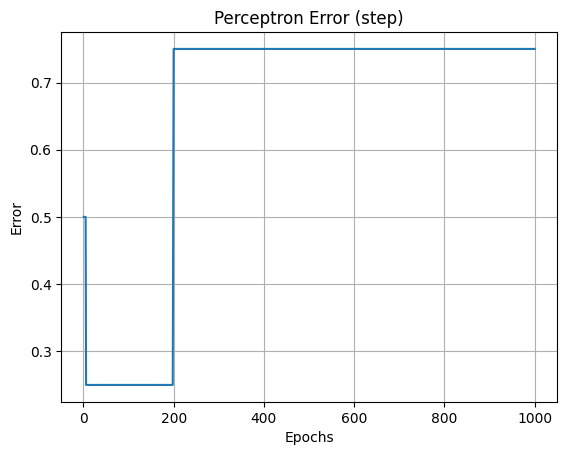

Activation Function: sigmoid
Final Weights: [0.01686915 0.01674429]
Final Bias: 0.0


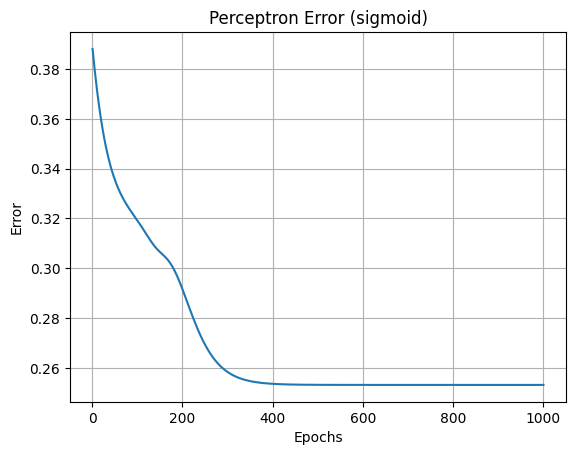

Activation Function: relu
Final Weights: [0.34482759 0.34482759]
Final Bias: 0.0


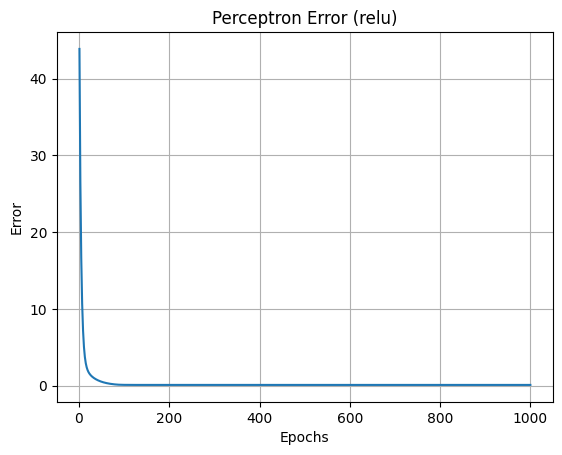

Activation Function: bipolar_step
Final Weights: [1.00000000e-01 1.38777878e-17]
Final Bias: 0.0


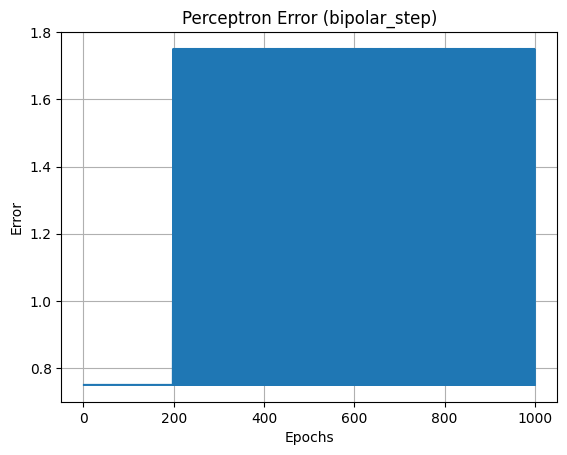

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(inputs, weights, activation):
    # Ensure inputs is a 2D array for the dot product operation
    inputs = np.atleast_2d(inputs)

    # Calculate the weighted sum (including bias)
    z = np.dot(weights, inputs.T) # Transpose inputs to match dimensions

    # Apply chosen activation function
    if activation == "step":
        output = 1 if z > 0 else 0 
    elif activation == "sigmoid":
        output = 1 / (1 + np.exp(-z))
    elif activation == "relu":
        output = max(0, z)
    elif activation == "bipolar_step":
        output = 1 if z > 0 else -1
    else:
        raise ValueError("Invalid activation function provided.")

    return output

def train_perceptron(data, target, epochs, learning_rate, initial_weights, activation):
  weights = initial_weights[:len(data[0])]  # Take relevant weights based on input dimension
  errors = []

  for epoch in range(epochs):
    total_error = 0
    for i, (x, y) in enumerate(zip(data, target)):
      predicted = perceptron(x, weights, activation)
      error = y - predicted
      total_error += error**2

      # Update weights based on error
      weights += learning_rate * error * x

    # Calculate average error for the epoch
    average_error = total_error / len(data)
    errors.append(average_error)

    # Check for convergence
    if average_error <= 0.002:
      print(f"Converged in {epoch+1} epochs!")
      break

  return weights, 0.0, errors  # Assuming bias is zero

def plot_errors(epochs, errors, title):
  """
  Plots the errors vs epochs.

  Args:
      epochs: A list of epochs.
      errors: A list of errors for each epoch.
      title: The title for the plot.
  """
  plt.plot(epochs, errors)
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title(title)
  plt.grid(True)
  plt.show()

# Define initial weights and bias (assuming bias is zero)
W0 = 10
W1 = 0.2
W2 = -0.75
bias = 0  # Assuming bias is zero
learning_rate = 0.05

# Sample training data (replace with your actual data)
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 0, 0, 1])

activations = ["step", "sigmoid", "relu", "bipolar_step"]
for activation in activations:
  weights, bias, errors = train_perceptron(data, target, 1000, learning_rate, np.array([W0, W1, W2]), activation)
  print(f"Activation Function: {activation}")
  print(f"Final Weights: {weights}")
  print(f"Final Bias: {bias}")

  # New data point for prediction (replace with your actual data)
  new_data = np.array([0.2, 0.7])

  # Plot errors vs epochs
  plot_errors(range(1, len(errors)+1), errors, f"Perceptron Error ({activation})")

A10

c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_m


Predicted Outputs for AND Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


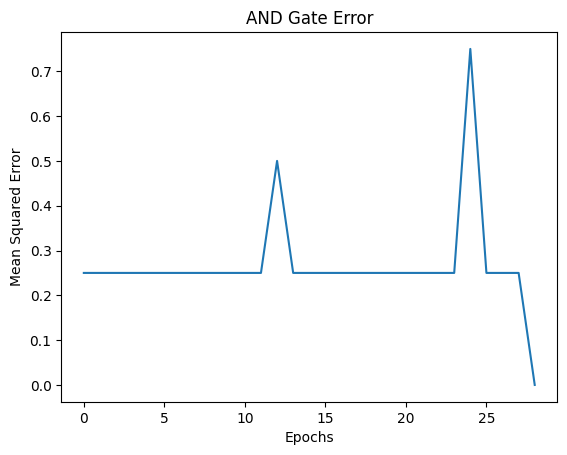

c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_m


Predicted Outputs for XOR Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 0


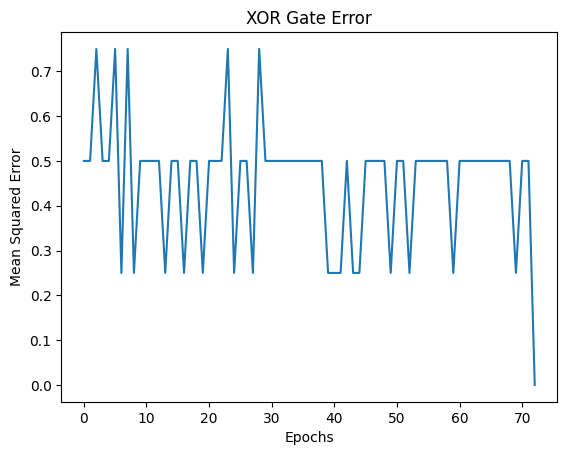

In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define functions for AND and XOR gates
def AND(x1, x2):
  return np.bitwise_and(x1, x2)

def XOR(x1, x2):
  return np.bitwise_xor(x1, x2)

# Generate data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = AND(X_and[:, 0], X_and[:, 1])

# Generate data for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = XOR(X_xor[:, 0], X_xor[:, 1])

# Define function to train and plot errors
def train_and_plot(X, y, title):
  errors = []
  for epoch in range(1000):
    # Define and train the MLP classifier
    mlp = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(4,), max_iter=1)
    mlp.fit(X, y)

    # Predict and calculate error
    y_pred = mlp.predict(X)
    error = np.mean((y - y_pred)**2)
    errors.append(error)

    # Stop if convergence criteria met
    if error <= 0.002:
      break

  # Print predicted output
  print(f"\nPredicted Outputs for {title} Gate:")
  for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i]}")

  # Plot epochs vs error
  plt.plot(range(len(errors)), errors)
  plt.xlabel("Epochs")
  plt.ylabel("Mean Squared Error")
  plt.title(f"{title} Gate Error")
  plt.show()

# Train and plot for AND gate
train_and_plot(X_and, y_and, "AND")

# Train and plot for XOR gate
train_and_plot(X_xor, y_xor, "XOR")


In [11]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
data = pd.read_csv(r"C:\Users\THANUJ RAJA\OneDrive\Desktop\sentimentdataset.csv")


numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])


classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Retweets','Likes']), data['Sentiment'], test_size=0.2, random_state=42)


classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: A given column is not a column of the dataframe